# **Resolución de la ecuación de Schrödinger unidimensional para un potencial cuadrado. Estudio del coeficiente de transmisión.**
## Problema Voluntario 3
### Física Computacional - 2025

---
## Gráficos utilizados. Representación gráfica de los datos
---


# Dependencia del coeficiente de transmisión con los parámetros de la simulación

## Coeficiente de transmisión y probabilidad máxima

<>:12: SyntaxWarning: invalid escape sequence '\l'
<>:12: SyntaxWarning: invalid escape sequence '\l'
C:\Users\iblra\AppData\Local\Temp\ipykernel_20540\2673307593.py:12: SyntaxWarning: invalid escape sequence '\l'
  plt.title("Evolución temporal de la probabilidad de detección\nEjemplo para $\lambda = 0.3$, $N=100$, $T=800$")


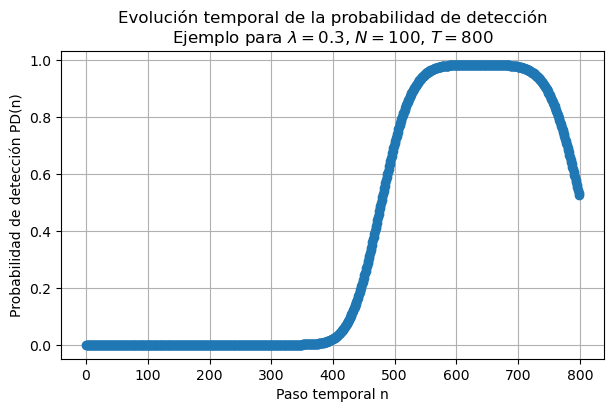

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
n, PD = np.loadtxt("PD.dat", unpack=True)

# Graficar
plt.figure(figsize=(7,4))
plt.plot(n, PD, marker='o', linestyle='-')
plt.xlabel("Paso temporal n")
plt.ylabel("Probabilidad de detección PD(n)")
plt.title("Evolución temporal de la probabilidad de detección\nEjemplo para $\lambda = 0.3$, $N=100$, $T=800$")
plt.grid(True)
plt.show()

## Coeficiente de transmisión y altura del potencial $\lambda$


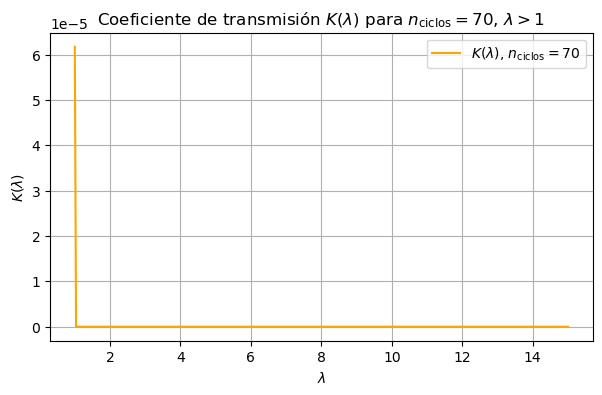

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
nciclos = 70
lambdas = np.linspace(1.001, 15, 400)  # Desde lambda > 1 hasta 15

# Fórmula de K(lambda) para lambda > 1
numerador = 4 * (lambdas - 1)
argumento = (2 * np.pi / 5) * nciclos * np.sqrt(lambdas - 1)
denominador = 4 * (lambdas - 1) + (lambdas**2) * (np.sinh(argumento))**2
K = numerador / denominador

plt.figure(figsize=(7, 4))
plt.plot(lambdas, K, color='orange', label=r'$K(\lambda)$, $n_\mathrm{ciclos}=70$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$K(\lambda)$')
plt.title(r'Coeficiente de transmisión $K(\lambda)$ para $n_\mathrm{ciclos}=70$, $\lambda > 1$')
plt.legend()
plt.grid(True)
plt.show()

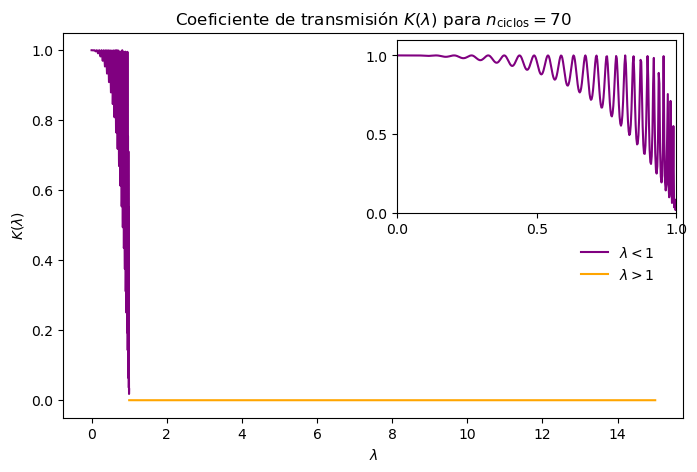

In [17]:

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Parámetros
nciclos = 70

# Lambda para ambos casos
lambdas1 = np.linspace(0, 0.999, 400)    # 0 < lambda < 1
lambdas2 = np.linspace(1.001, 15, 400)   # 1 < lambda < 15

# K(lambda) para lambda < 1
num1 = 4 * (1 - lambdas1)
arg1 = (2 * np.pi / 5) * nciclos * np.sqrt(1 - lambdas1)
den1 = 4 * (1 - lambdas1) + (lambdas1**2) * (np.sin(arg1))**2
K1 = num1 / den1

# K(lambda) para lambda > 1
num2 = 4 * (lambdas2 - 1)
arg2 = (2 * np.pi / 5) * nciclos * np.sqrt(lambdas2 - 1)
den2 = 4 * (lambdas2 - 1) + (lambdas2**2) * (np.sinh(arg2))**2
K2 = num2 / den2

fig, ax = plt.subplots(figsize=(8, 5))
line1, = ax.plot(lambdas1, K1, color='purple', label=r'$\lambda < 1$ (línea morada)')
line2, = ax.plot(lambdas2, K2, color='orange', label=r'$\lambda > 1$ (línea naranja)')
ax.set_xlabel(r'$\lambda$')
ax.set_ylabel(r'$K(\lambda)$')
ax.set_title(r'Coeficiente de transmisión $K(\lambda)$ para $n_\mathrm{ciclos}=70$')
ax.grid(False)

# Inset para el zoom en 0 < lambda < 1
ax_inset = inset_axes(ax, width="45%", height="45%", loc='upper right')
ax_inset.plot(lambdas1, K1, color='purple')
ax_inset.set_xlim(0, 1)
ax_inset.set_ylim(0, 1.1)
ax_inset.set_xticks([0, 0.5, 1])
ax_inset.set_yticks([0, 0.5, 1])
ax_inset.grid(False)

# Leyenda general debajo del zoom
fig.legend(
    [line1, line2],
    [r'$\lambda < 1$', r'$\lambda > 1$'],
    loc='upper right',
    bbox_to_anchor=(0.88, 0.48),  # Ajusta la posición debajo del zoom
    fontsize=10,
    frameon=False
)

plt.show()

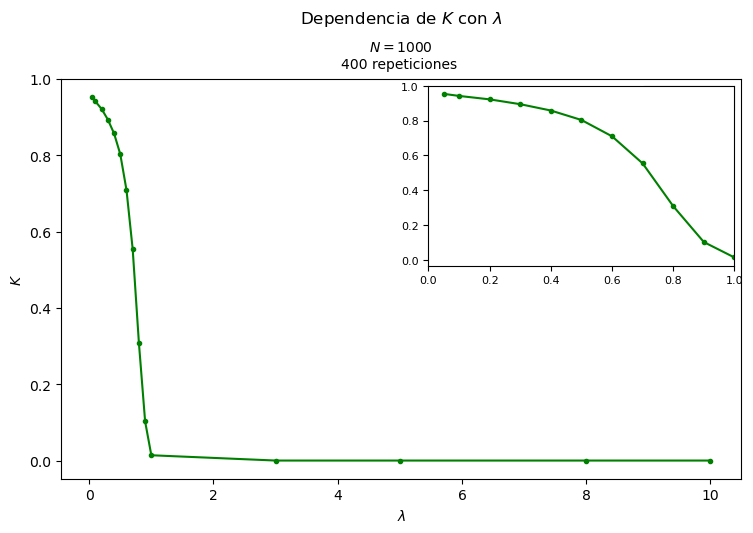

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo KvsLambda.txt
lambdas, K = np.loadtxt("KvsLambda.txt", unpack=True)

plt.figure(figsize=(8, 5))

# Gráfica principal
plt.plot(lambdas, K, 'o-', markersize=3, color='green', label=r'$K$ vs $\lambda$')
plt.xlabel(r'$\lambda$')
plt.ylabel(r'$K$')
plt.title(r'Dependencia de $K$ con $\lambda$', pad=40)
plt.text(0.5, 1.02, "$N=1000$\n400 repeticiones ", fontsize=10, ha='center', va='bottom', transform=plt.gca().transAxes)
plt.grid(False)
plt.legend()

# Inset: ampliación para 0 <= lambda <= 1
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

ax_inset = inset_axes(plt.gca(), width="45%", height="45%", loc='upper right')
mask = (lambdas >= 0) & (lambdas <= 1)
ax_inset.plot(lambdas[mask], K[mask], 'o-', markersize=3, color='green')
ax_inset.set_xlim(0, 1)
ax_inset.grid(False)
ax_inset.tick_params(labelsize=8)

plt.subplots_adjust(right=0.95, left=0.10, top=0.92, bottom=0.12)
plt.show()

## Coeficiente de transmisión y parámetro espacial $N$

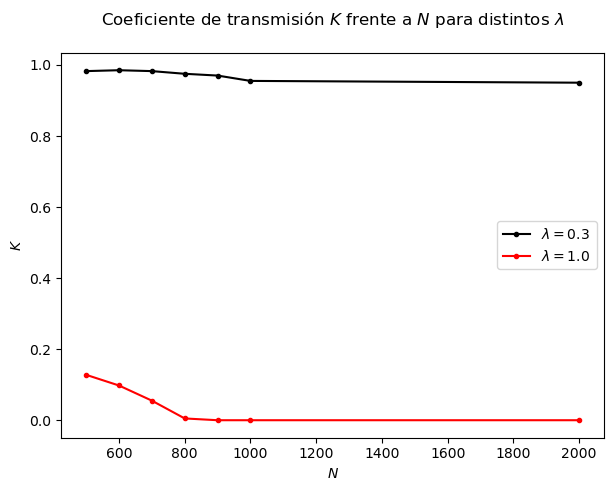

In [106]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos del archivo KvsN.txt
# El archivo debe tener: N  K_lambda03  K_lambda10
N, K03, K10 = np.loadtxt("KvsN.txt", unpack=True)

plt.figure(figsize=(7, 5))
plt.plot(N, K03, 'o-', markersize=3, color='black', label=r'$\lambda=0.3$ ')
plt.plot(N, K10, 'o-', markersize=3, color='red', label=r'$\lambda=1.0$ ')
plt.xlabel(r'$N$')
plt.ylabel(r'$K$')
plt.title(r'Coeficiente de transmisión $K$ frente a $N$ para distintos $\lambda$', pad=20)
plt.legend()
plt.grid(False)
plt.show()

---

# Cálculo de los valores esperados de observables

## Valor esperado de la posición y la energía cinética


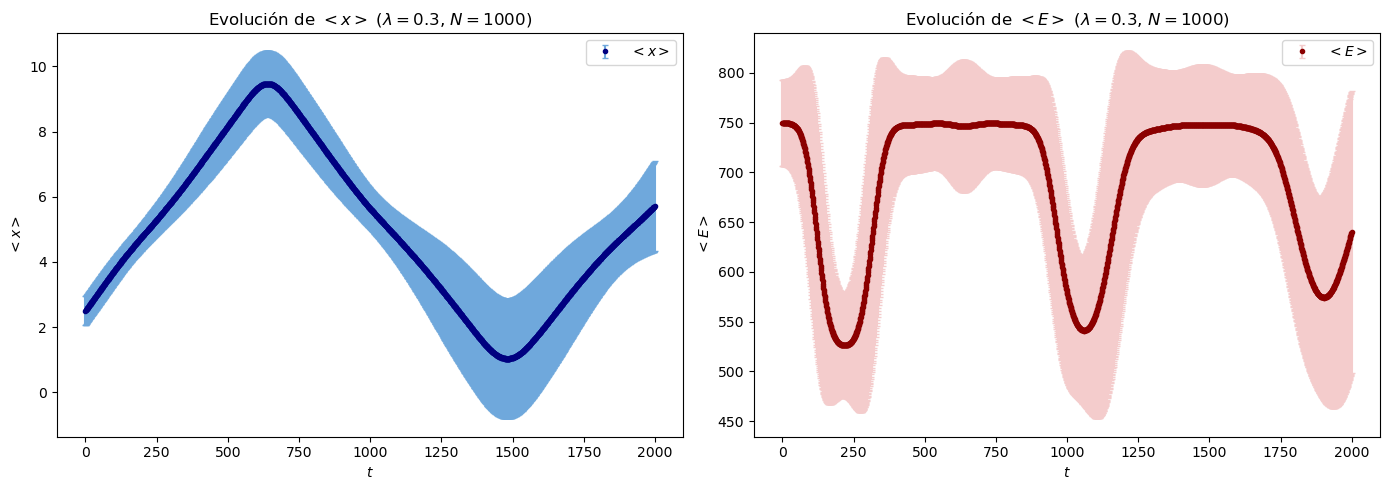

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos de ambos archivos
t03, x_esp03, err_x03 = np.loadtxt("xesp03.dat", unpack=True)
t03_T, T_esp03, err_T03 = np.loadtxt("Tesp03.dat", unpack=True)

fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=False)

# Gráfica para <x>
axs[0].errorbar(
    t03, x_esp03, yerr=err_x03,
    fmt='o', markersize=3, color='navy', ecolor='#6fa8dc', capsize=2,
    label=r'$<x>$'
)
axs[0].set_xlabel("$t$")
axs[0].set_ylabel("$<x>$")
axs[0].set_title(r"Evolución de $<x>$ ($\lambda = 0.3$, $N=1000$)")
axs[0].grid(False)
axs[0].legend()

# Gráfica para <T>
axs[1].errorbar(
    t03_T, T_esp03, yerr=err_T03,
    fmt='o', markersize=3, color='darkred', ecolor='#f4cccc', capsize=2,
    label=r'$<E>$'
)
axs[1].set_xlabel("$t$")
axs[1].set_ylabel("$<E>$")
axs[1].set_title(r"Evolución de $<E>$ ($\lambda = 0.3$, $N=1000$)")
axs[1].grid(False)
axs[1].legend()

plt.tight_layout()
plt.show()

---

## Potencial multibarrera

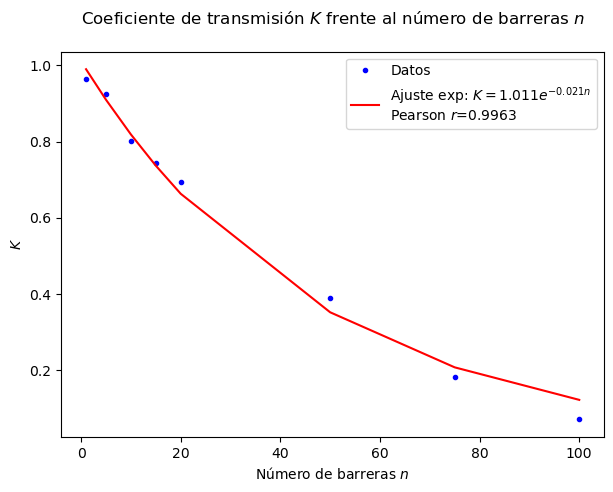

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import pearsonr

# Cargar los datos del archivo Kvsbarreras.txt
n_barreras, K = np.loadtxt("Kvsbarreras.txt", unpack=True)

# Definir la función exponencial para el ajuste
def exp_func(n, a, b):
    return a * np.exp(-b * n)

# Ajuste exponencial
popt, pcov = curve_fit(exp_func, n_barreras, K, p0=(1, 0.1))

# Calcular el coeficiente de Pearson
K_fit = exp_func(n_barreras, *popt)
pearson_coef, pearson_p = pearsonr(K, K_fit)

# Graficar datos y ajuste
plt.figure(figsize=(7, 5))
plt.plot(n_barreras, K, 'o', markersize=3, color='blue', label='Datos')
plt.plot(n_barreras, K_fit, '-', color='red', label=f'Ajuste exp: $K = {popt[0]:.3f} e^{{-{popt[1]:.3f} n}}$\nPearson $r$={pearson_coef:.4f}')
plt.xlabel('Número de barreras $n$')
plt.ylabel(r'$K$')
plt.title(r'Coeficiente de transmisión $K$ frente al número de barreras $n$', pad=20)
plt.legend()
plt.grid(False)
plt.show()